# Pauli Gates

In [1]:
from qiskit import *
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector

## X-gate
Rotates qubit by $\pi$ radians along the x-axis
$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$


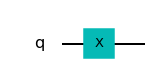

In [4]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

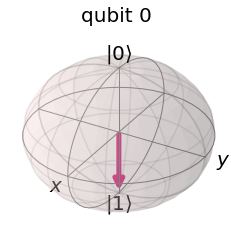

In [5]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

## Y-gate
Rotates qubit by $\pi$ radians along the y-axis
$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = -i|0\rangle\langle1| + i|1\rangle\langle0| $$


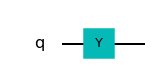

In [3]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw('mpl')

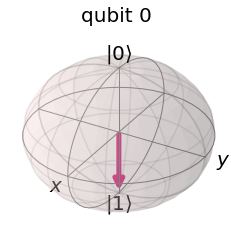

In [4]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out)

## Z-gate
Rotates qubit by $\pi$ radians along the z-axis
$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0\rangle\langle0| - |1\rangle\langle1| $$


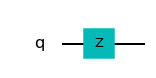

In [5]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')

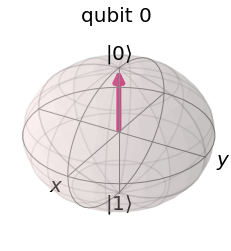

In [6]:
out = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out)

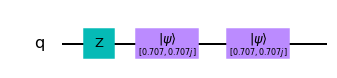

In [10]:
intial_state = [1./sqrt(2), 1.j/sqrt(2)]
qc.initialize(intial_state, 0)
qc.draw('mpl')

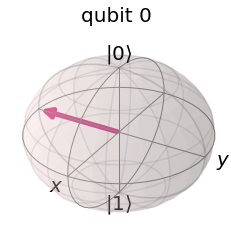

In [13]:
qc.x(0)
plot_bloch_multivector(execute(qc, backend).result().get_statevector())

## Hadamard Gate
Using only the Pauli Gates can't help us achieve superposition because the only states we get are $|0\rangle$ and $|1\rangle$. Hadamard Gate allows us to move away from the poles of bloch sphere and create a superposition between $|0\rangle$ and $|1\rangle$
$$H = 1/\sqrt2 \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$


In [23]:
qc = QuantumCircuit(1)

qc.h(0)
qc.z(0)
qc.h(0)

#This works like an X-gate  (HZH)

qc.draw('text')

┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ Z ├┤ H ├
     └───┘└───┘└───┘

In [24]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc, backend).result().get_statevector()
print(out)

[0.+6.123234e-17j 1.-6.123234e-17j]


## Digression: Measuring in different basis
There are infinitely many bases other than the computational bases (Z-basis) $|0\rangle$ and $|1\rangle$. We can measure our qubits in any basis. Qiskit allows measuring only in Z-basis, therefore we must create our own using hadamard gates. 

### Measurement in X-basis

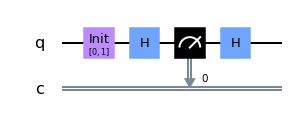

In [17]:
from qiskit.extensions import Initialize
def x_measurement(qc, qubit, cbit):
    qc.h(qubit)
    qc.measure(qubit,cbit)
    qc.h(qubit)
    return qc
qc = QuantumCircuit(1,1)
initial_state = [0,1]
initializer = Initialize(initial_state)
initializer.label = 'init'
qc.append(initializer, [0])
x_measurement(qc, 0, 0)
qc.draw('mpl')

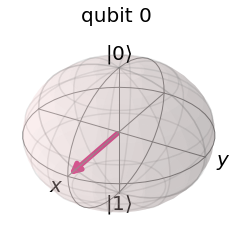

In [18]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out)

If you run the cell multiple times you will find that the measured states always comes out to be either $|+\rangle$ or $|-\rangle$, i.e. the X-basis